Linear Programming

Selected items:
Item 1: weight=20, value=100
Item 2: weight=30, value=120
Total value: 220


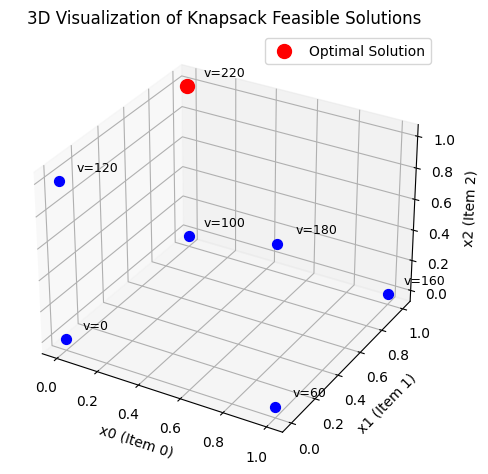

In [ ]:

#--pip install pulp
import pulp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

def linearprog(weights, values, capacity):
    n_items = len(weights)
    
    # Define the LP problem: maximize
    prob = pulp.LpProblem("0-1_Knapsack", pulp.LpMaximize)
    
    # Define binary decision variables: x[i] ∈ {0, 1}
    x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(n_items)]
    
    # Objective: Maximize total value
    prob += pulp.lpSum(values[i] * x[i] for i in range(n_items))
    
    # Constraint: Total weight cannot exceed capacity
    prob += pulp.lpSum(weights[i] * x[i] for i in range(n_items)) <= capacity
    
    # Solve
    prob.solve()

    # Collect results
    selected_items = [i for i in range(n_items) if x[i].value() == 1]
    total_value = sum(values[i] for i in selected_items)
    selected_solution = [int(x[i].value()) for i in range(n_items)]

    return selected_items, total_value, selected_solution

def plot_feasible_knapsack_3D(weights, values, capacity, selected_solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    feasible_points = []
    for x_vals in product([0, 1], repeat=3):
        total_weight = sum(weights[i] * x_vals[i] for i in range(3))
        total_value = sum(values[i] * x_vals[i] for i in range(3))
        if total_weight <= capacity:
            feasible_points.append((x_vals, total_value))

    # Plot feasible points
    for (x0, x1, x2), val in feasible_points:
        ax.scatter(x0, x1, x2, color='blue', s=50)
        ax.text(x0 + 0.05, x1 + 0.05, x2 + 0.05, f'v={val}', fontsize=9)

    # Plot optimal solution
    x0, x1, x2 = selected_solution
    ax.scatter(x0, x1, x2, color='red', s=100, label='Optimal Solution')

    ax.set_xlabel('x0 (Item 0)')
    ax.set_ylabel('x1 (Item 1)')
    ax.set_zlabel('x2 (Item 2)')
    ax.set_title('3D Visualization of Knapsack Feasible Solutions')
    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    weights = [10, 20, 30]
    values = [60, 100, 120]
    capacity = 50

    selected_items, total_value, selected_solution = linearprog(weights, values, capacity)

    print("Selected items:")
    for i in selected_items:
        print(f"Item {i}: weight={weights[i]}, value={values[i]}")
    print("Total value:", total_value)

    plot_feasible_knapsack_3D(weights, values, capacity, selected_solution)